# 14. Seaborn: distributions and relations

As we have just seen, seaborn allows to draw very quickly complex plots in order to explore data. Here we further explore the capabilities offered by the packages to quickly visualize relations and ditributions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diams = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Diamond.csv', index_col=0)

## Generalistic functions

Seaborn has seversl generalistic functions offering a framework to display ditributions or relations. They essentially build on simpler functions like ```scatterplot``` or ```histplot``` but can be quickly used to switch visualization types.

As we have already seen options for scatter plots, we here we explore ```catplot``` which gives access to a long list of other plotting functions such as boxplots, swarmplots etc. all working with the same syntax.

Let's see what de default settings produce when we want to visualize the price distribution ```y``` for each color ```x```:

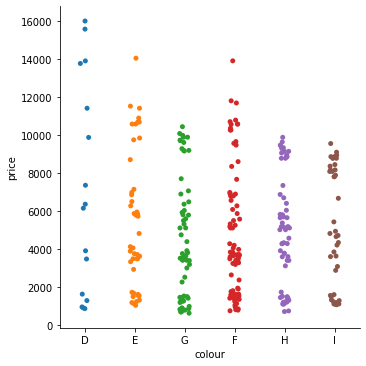

In [ ]:
g = sns.catplot(data=diams, x='colour', y='price');

The result is a very reasonable stripplot, a scatter plot with one categorical variable. As you can see some *jitter* is added to help visualize all points. Note that the output of ```catplot``` is a facetgrid object, not a simple axis. We wont explore in details facet grids, but just know that you can still acces the axes and the figure composing this object with:

In [ ]:
g

In [ ]:
g.ax

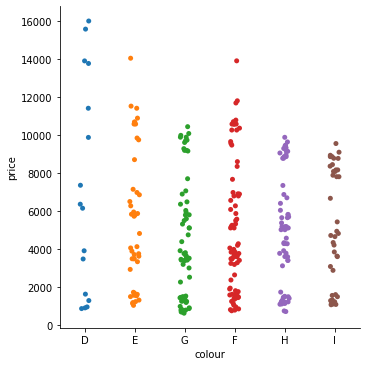

In [ ]:
g.fig

### Customization
As usual, you have many options to optimize the plot, some of them specific to the current type such as ```jitter```` here:

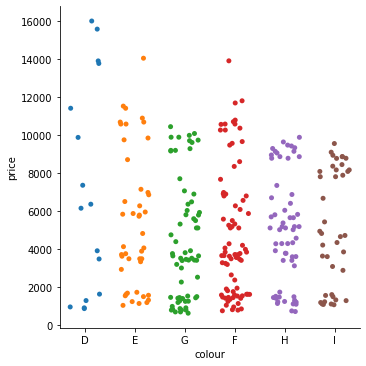

In [ ]:
sns.catplot(data=diams, x='colour', y='price', jitter=0.3);

In [ ]:
diams.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


Also, just like in the regular plots, we can use more than one aesthetic. We can for example here use the ```hue``` to represent the ```certification```:

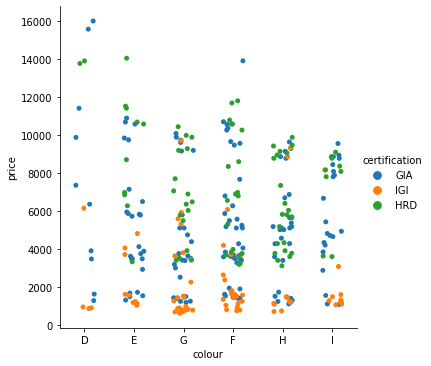

In [ ]:
sns.catplot(data=diams, x='colour', y='price', hue='certification', jitter=.2);

### Picking the type of plot
The ```catplot``` has one essential parameter, ```kind```, which allows us to select alternative types of plots. For example we can produce box plots or violin plots:

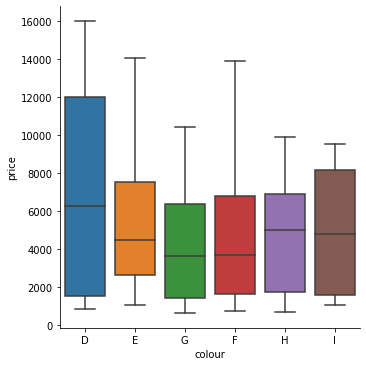

In [ ]:
sns.catplot(data=diams, x='colour', y='price', kind='box');

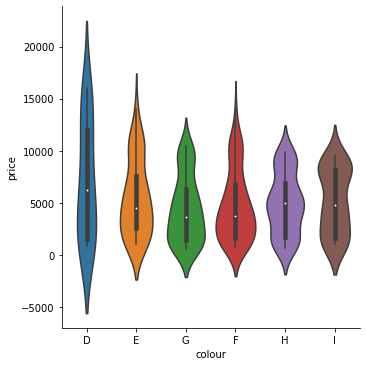

In [ ]:
sns.catplot(data=diams, x='colour', y='price', kind='violin');

Of course in each case, you could use the corresponing base function directly. For example for the ```boxplot``` function. Keep in mind that all these plots rely on Matplotlib, so usually, in addition to seaborn options, you can also use the appropriate Matplotlib options. For example here the ```boxprops``` option:

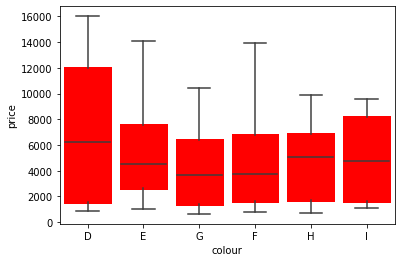

In [ ]:
boxprops = dict(linewidth=3, color='red')
sns.boxplot(data=diams, x='colour', y='price', boxprops=boxprops);

### Other plots

```catplot``` gives access to many more functions as visible [here](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot). For example you can easily also easily create a count histogram:

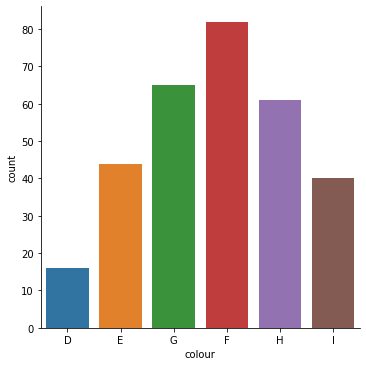

In [ ]:
sns.catplot(data=diams, x='colour', kind='count');

## Combining plots

It is often interesing to mix multiple plots. For example here we might want to see box plots and swarmplots overlapping to better visualize the distribution. Here again we first create an axis object that we can repeatedly use afterwards. We also use here the base functions:

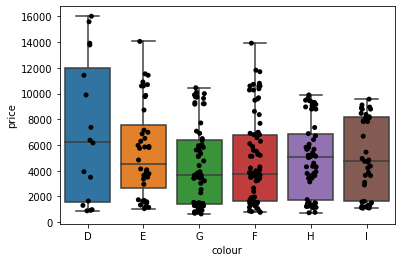

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data=diams, x='colour', y='price', ax=ax);
sns.stripplot(data=diams, x='colour', y='price', color='k',ax=ax);

## 2D distributions

We have seen until know only 1D distributions as histograms and plotted 2D relations as scatterplots. We can however also represent 2D distributions directly, which is particularly helpful if datapoints are very dense. For that we can simply use the ```histplot``` function, but with both ```x``` and ```y``` parameters.

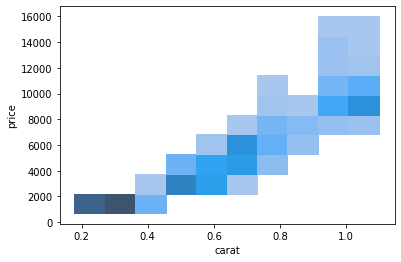

In [ ]:
sns.histplot(diams, x="carat", y="price")

Alternatively we can also use here the more general ```displot``` function, which functions in the same way as the ```catplot``` in that we can choose the ```kind``` of plot we want such as ```hist``` or ```kde```: 

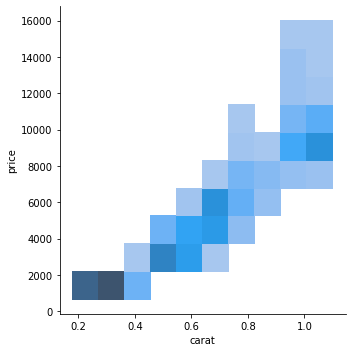

In [ ]:
sns.displot(diams, x="carat", y="price");

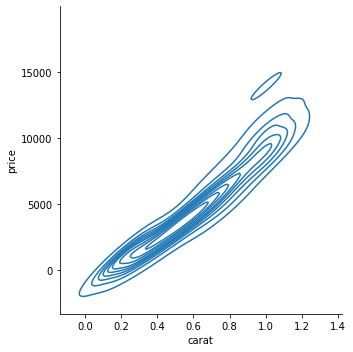

In [ ]:
sns.displot(diams, x="carat", y="price", kind='kde');

## Exploring with pairplots and jointplots

Seaborn also offers a very efficient way to check relationships between multiple variables of a dataset with the ```pairplot``` and ```jointplot``` functions.

By default ```pairplot``` producess a grid with histograms and scatterplots for all pairs of varaibles:


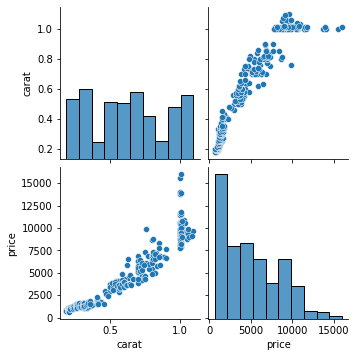

In [ ]:
sns.pairplot(diams);

This can be adjuste of course. For example we could use a kde on the diagonal for example:

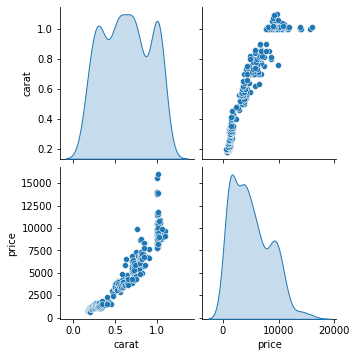

In [ ]:
sns.pairplot(diams, diag_kind='kde');

The ```jointplot``` functions allows to show at the same time the relation between two variables and their distribution:

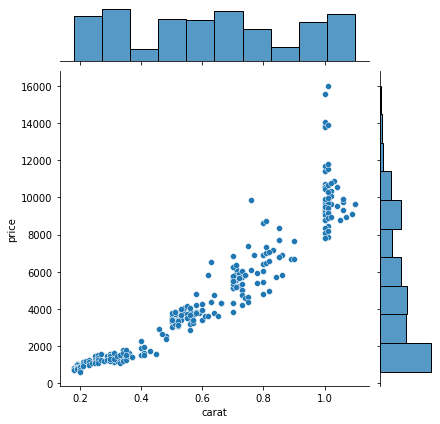

In [ ]:
sns.jointplot(data=diams, x="carat", y="price");


## Exercise

1. Knowing that the type of plot below has the kind ```swarm``` for swarmplot, try to reproduce the figure below.

2. Using ```displot``` show the 2D distribution of bill length and bill depth as shown in the second plot.
![](https://github.com/guiwitz/ISDAwPython_day2/raw/master/plots/ex_16_1.png)
![](https://github.com/guiwitz/ISDAwPython_day2/raw/master/plots/ex_16_2.png)


In [ ]:
penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
